In [4]:
# !pip install tensorflow_text
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.5 MB/s eta 0:00:00


In [1]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.6 MB/s eta 0:00:00


In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re

import tensorflow_hub as hub
import tensorflow as tf
# import tensorflow_text as text
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
# from transformers import *
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# connecting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading dataset
data_true = pd.read_csv("/content/drive/My Drive/Dad Damilola/Fake News Dataset/fakenews/True.csv")
data_fake = pd.read_csv("/content/drive/My Drive/Dad Damilola/Fake News Dataset/fakenews/Fake.csv")


In [5]:
data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
data_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
data_fake.shape, data_true.shape

((23481, 4), (21417, 4))

In [8]:
# appending labels to the true and fake dataset
data_true['Target'] = ['True']*len(data_true)
data_fake['Target'] = ['Fake']*len(data_fake)

In [9]:

dataset = data_true.append(data_fake).sample(frac=1).reset_index().drop(columns=['index'])


In [10]:
dataset.head(10)

,title,text,subject,date,Target
0,JUST IN: Mystery Surrounds Obama Appointee Jud...,"A federal judge in Washington, D.C. has recuse...",Government News,"Dec 16, 2017",Fake
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,Find out how many are going to sign up to go ...,Government News,"Apr 10, 2015",Fake
2,#NeverTrump GOPers Demand Emergency RNC Meeti...,The #NeverTrump GOP delegates are a determined...,News,"August 8, 2016",Fake
3,Former Army Ranger is Only Steelers Player Who...,Former Army Ranger Alejandro Villanueva was th...,politics,"Sep 24, 2017",Fake
4,Ukraine's Poroshenko rejects Russia's 'hybrid'...,UNITED NATIONS (Reuters) - Ukrainian President...,worldnews,"September 21, 2017",True
5,WOW! MAJOR CREDIT CARD COMPANY Still Sponsorin...,Delta Air Lines and Bank of America became ...,left-news,"Jun 12, 2017",Fake
6,Lebanese foreign minister says hopes Hariri re...,MOSCOW (Reuters) - Lebanon s Foreign Minister ...,worldnews,"November 17, 2017",True
7,U.N. seeks humanitarian pause in Sanaa where s...,GENEVA (Reuters) - The United Nations called o...,worldnews,"December 4, 2017",True
8,SKETCHY FIRM BEHIND SALACIOUS ALLEGATIONS Agai...,Remember Fusion GPS (please see our previous r...,left-news,"Aug 11, 2017",Fake
9,Exclusive: U.S. plans new wave of immigrant de...,WASHINGTON (Reuters) - U.S. immigration offici...,politicsNews,"May 12, 2016",True


In [11]:
dataset["Target"].value_counts()

Fake    23481
True    21417
Name: Target, dtype: int64

In [12]:
# one hot encoding of labels
dataset['label'] = pd.get_dummies(dataset.Target)['Fake']

In [13]:
dataset.head(10)

,title,text,subject,date,Target,label
0,JUST IN: Mystery Surrounds Obama Appointee Jud...,"A federal judge in Washington, D.C. has recuse...",Government News,"Dec 16, 2017",Fake,1
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,Find out how many are going to sign up to go ...,Government News,"Apr 10, 2015",Fake,1
2,#NeverTrump GOPers Demand Emergency RNC Meeti...,The #NeverTrump GOP delegates are a determined...,News,"August 8, 2016",Fake,1
3,Former Army Ranger is Only Steelers Player Who...,Former Army Ranger Alejandro Villanueva was th...,politics,"Sep 24, 2017",Fake,1
4,Ukraine's Poroshenko rejects Russia's 'hybrid'...,UNITED NATIONS (Reuters) - Ukrainian President...,worldnews,"September 21, 2017",True,0
5,WOW! MAJOR CREDIT CARD COMPANY Still Sponsorin...,Delta Air Lines and Bank of America became ...,left-news,"Jun 12, 2017",Fake,1
6,Lebanese foreign minister says hopes Hariri re...,MOSCOW (Reuters) - Lebanon s Foreign Minister ...,worldnews,"November 17, 2017",True,0
7,U.N. seeks humanitarian pause in Sanaa where s...,GENEVA (Reuters) - The United Nations called o...,worldnews,"December 4, 2017",True,0
8,SKETCHY FIRM BEHIND SALACIOUS ALLEGATIONS Agai...,Remember Fusion GPS (please see our previous r...,left-news,"Aug 11, 2017",Fake,1
9,Exclusive: U.S. plans new wave of immigrant de...,WASHINGTON (Reuters) - U.S. immigration offici...,politicsNews,"May 12, 2016",True,0


In [14]:
# data cleaning
def removal(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\(|D|P)',text.lower())
    text = re.sub('[\W]+', ' ', text.lower())
    text += ' '.join(emoticons).replace('-', '')
    return text

In [15]:
dataset["text"] = dataset["text"].apply(removal)

In [16]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)
dataset["text"] =dataset["text"].map(remove_stopwords)

In [17]:
X = dataset["text"]
y = dataset["label"]

In [18]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.25)

In [21]:
X_train

8310     republicans repeatedly tell us schools would s...
9268     moscow reuters russia defense ministry said th...
35636    reuters former virginia governor jim gilmore e...
24215    republican senate majority leader mitch mcconn...
23774    washington reuters republican lawmakers plan i...
                               ...                        
24632    yet another morning rant donald trump blamed a...
2123     reuters u senate democratic leader chuck schum...
19703    conservative reporter brave enough grab mic cl...
44826    trump administration collective neck scandals ...
14042    seoul reuters president donald trump wrap visi...
Name: text, Length: 33673, dtype: object

In [22]:
# # importing the bert model
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [23]:
def cnn_model(inputs):
    x = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=64, activation='relu')(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
    return x

In [24]:
# Define the input layer
inputs = tf.keras.layers.Input(shape=(None,))

# Pass the inputs through BERT and CNN model
x = bert_model(inputs)[0]
x = cnn_model(x)

# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=x)

TypeError: ignored

In [ ]:
# creating embeddings for each sentence
def embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)["pooled_output"] 

In [ ]:
embedding(["go home"])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-9.59798157e-01, -4.21478420e-01, -9.04650807e-01,
         9.32171047e-01,  7.25922585e-01, -1.63343042e-01,
         9.63028908e-01,  2.53664762e-01, -8.53743255e-01,
        -9.99994993e-01, -7.28642166e-01,  9.76342022e-01,
         9.87955630e-01,  5.10887921e-01,  9.65139508e-01,
        -8.31101120e-01, -6.54445708e-01, -6.52388036e-01,
         2.98883259e-01, -8.58494818e-01,  7.61531711e-01,
         9.99987543e-01, -5.80830202e-02,  2.36011460e-01,
         5.59319973e-01,  9.98666108e-01, -8.62367034e-01,
         9.66110587e-01,  9.80176687e-01,  7.05167830e-01,
        -8.26560676e-01,  1.82984799e-01, -9.92942333e-01,
        -1.49280608e-01, -8.72989416e-01, -9.96069610e-01,
         5.04737973e-01, -8.47799361e-01,  1.67610422e-01,
        -6.20282739e-02, -9.56214845e-01,  3.17191541e-01,
         9.99989748e-01,  4.53662515e-01,  5.30768514e-01,
        -2.16565356e-01, -1.00000000e+00,  3.55268329e-01,
      

In [ ]:
# bert layer
input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = "text")
preprocessed_text = bert_preprocess(input)
outputs = bert_encoder(preprocessed_text)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
outputs

{'sequence_output': <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
 'pooled_output': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>,
 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32

In [ ]:
# DL layer
layer = tf.keras.layers.Dropout(0.1, name = "dropout")(outputs["pooled_output"])

layer = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(layer)

In [ ]:
model = tf.keras.Model(inputs = [input], outputs = [layer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

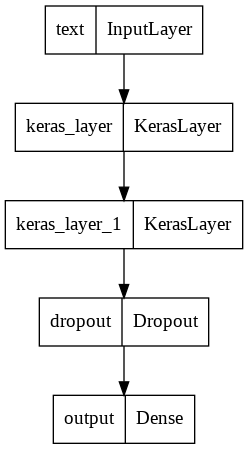

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


ValueError: ignored

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

In [ ]:
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
confusion

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(confusion,annot = True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()